<a href="https://colab.research.google.com/github/C3578/correlation-Real-GDP-growth-Russia/blob/master/correlation_Real_GDP_growth_Russia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Цель – определить зависимость показателя роста(изменения) ВВП(Real GDP growth) России от показателей роста(изменения) ВВП других стран. А также предсказать значение роста(изменения) ВВП России основываясь на значениях данной характеристики для других стран.

In [ ]:
#  Подключим google диск к colab.

from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pandas as pd     #  Импортируем библиотеку pandas

In [ ]:
data_root = '...'

In [ ]:
df = pd.read_excel(data_root + 'imf.xlsx')

In [ ]:
df.shape      #  Посмотрим на размер нашего DataFrame

(229, 43)

In [ ]:
#  посмотрим на первые пять строчек нашего dataframe

df.head() 

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14,5.7,2.7,1,2.2,2.9,2.7,3,-3,4.5
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,9.8,-10,-28,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6,7.5,3.4,3.7,2.5,1.4,1,1.8,2.2,3.3,3.8,4.1,2.2,-5,8
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.8,3.4,2.8,3.8,3.7,3.2,1.3,1.4,0.7,-5.2,6.2
4,Angola,2.4,-4.4,0,4.2,6,3.5,2.9,4.1,6.1,0,-3.5,12.1,11.4,11,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3,11,15,11.5,14,11.2,0.9,4.9,3.5,8.5,5,4.8,0.9,-2.6,-0.2,-1.2,-1.5,-1.4,2.6


In [ ]:
#  В библиотеке pandas уже есть значение, отвечающее за отсутствие данных - это "NaN"
#  Заменим значения "no data" на "NaN", чтобы система могла воспринимать его правильно.

In [ ]:
df = pd.read_excel(data_root + 'imf.xlsx', na_values='no data')

In [ ]:
df.head()

,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14.0,5.7,2.7,1.0,2.2,2.9,2.7,3.0,-3.0,4.5
2,Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,9.8,-10.0,-28.0,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6.0,7.5,3.4,3.7,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-5.0,8.0
3,Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3.0,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.8,3.4,2.8,3.8,3.7,3.2,1.3,1.4,0.7,-5.2,6.2
4,Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,0.0,-3.5,12.1,11.4,11.0,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3.0,11.0,15.0,11.5,14.0,11.2,0.9,4.9,3.5,8.5,5.0,4.8,0.9,-2.6,-0.2,-1.2,-1.5,-1.4,2.6


In [ ]:
#  Первая строка - пустая. Удалим её.

df = df.drop(0)

In [ ]:
#  Индексация строк у нас цифрами(от 1 до 228), заменим индексацию цифрами на индексацию по названию страны/региона

df.index = df['Real GDP growth (Annual percent change)']

In [ ]:
# Удалим столбец 'Real GDP growth (Annual percent change)' т.к. он уже является индексом

df = df.drop(columns = ['Real GDP growth (Annual percent change)'])

In [ ]:
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14.0,5.7,2.7,1.0,2.2,2.9,2.7,3.0,-3.0,4.5
Albania,2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,-1.4,9.8,-10.0,-28.0,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6.0,7.5,3.4,3.7,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-5.0,8.0
Algeria,-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,4.8,0.8,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3.0,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.8,3.4,2.8,3.8,3.7,3.2,1.3,1.4,0.7,-5.2,6.2
Angola,2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,6.1,0.0,-3.5,12.1,11.4,11.0,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3.0,11.0,15.0,11.5,14.0,11.2,0.9,4.9,3.5,8.5,5.0,4.8,0.9,-2.6,-0.2,-1.2,-1.5,-1.4,2.6
Antigua and Barbuda,8.2,3.8,-0.1,5.4,10.2,7.6,11.5,6.6,5.2,5.3,3.0,2.2,1.2,5.3,6.7,-4.4,6.6,5.5,4.7,3.7,6.7,-5.0,1.0,6.1,5.7,6.4,12.7,9.3,0.0,-12.1,-7.6,-2.0,3.4,-0.6,3.8,3.8,5.5,3.1,7.4,5.3,-10.0,8.0


In [ ]:
df.loc['Russian Federation']      #  Посмотрим на данные Russian Federation

1980     NaN
1981     NaN
1982     NaN
1983     NaN
1984     NaN
1985     NaN
1986     NaN
1987     NaN
1988     NaN
1989     NaN
1990     NaN
1991    -5.0
1992   -14.5
1993    -8.7
1994   -12.7
1995    -4.1
1996    -3.6
1997     1.4
1998    -5.3
1999     6.4
2000    10.0
2001     5.1
2002     4.7
2003     7.3
2004     7.2
2005     6.4
2006     8.2
2007     8.5
2008     5.2
2009    -7.8
2010     4.5
2011     5.1
2012     3.7
2013     1.8
2014     0.7
2015    -2.0
2016     0.3
2017     1.8
2018     2.5
2019     1.3
2020    -5.5
2021     3.5
Name: Russian Federation, dtype: float64

In [ ]:
# До 1991 года информации нет. Удалим данные до 1991 года.

In [ ]:
df = df.drop(columns = [1980,	1981,	1982,	1983,	1984,	1985, 1986,	1987,	1988,	1989,	1990])

In [ ]:
df.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,0.7,11.8,5.4,13.3,3.9,20.6,8.4,6.5,14.0,5.7,2.7,1.0,2.2,2.9,2.7,3.0,-3.0,4.5
Albania,-28.0,-7.2,9.6,9.4,8.9,9.1,-10.9,8.8,12.9,6.9,8.3,4.5,5.5,5.5,5.5,5.9,6.0,7.5,3.4,3.7,2.5,1.4,1.0,1.8,2.2,3.3,3.8,4.1,2.2,-5.0,8.0
Algeria,-1.2,1.6,-2.1,-0.9,3.8,3.8,1.1,5.1,3.2,3.8,3.0,5.6,7.2,4.3,5.9,1.7,3.4,2.4,1.6,3.6,2.8,3.4,2.8,3.8,3.7,3.2,1.3,1.4,0.7,-5.2,6.2
Angola,12.1,11.4,11.0,10.5,10.4,11.2,7.3,4.7,2.2,3.1,4.2,13.7,3.0,11.0,15.0,11.5,14.0,11.2,0.9,4.9,3.5,8.5,5.0,4.8,0.9,-2.6,-0.2,-1.2,-1.5,-1.4,2.6
Antigua and Barbuda,2.2,1.2,5.3,6.7,-4.4,6.6,5.5,4.7,3.7,6.7,-5.0,1.0,6.1,5.7,6.4,12.7,9.3,0.0,-12.1,-7.6,-2.0,3.4,-0.6,3.8,3.8,5.5,3.1,7.4,5.3,-10.0,8.0


In [ ]:
# Есть ли зависимость роста ВВП России от аналогичных показателей других стран? 
# Если есть, то от показателей каких стран в большей степени зависит рост ВВП России

In [ ]:
#  Для этого для начала перевернём(транспонируем) нашу таблицу.

df_T = df.T

In [ ]:
df_T.head()

Real GDP growth (Annual percent change),Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"China, People's Republic of",Colombia,Comoros,"Congo, Dem. Rep. of the","Congo, Republic of",...,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Africa (Region),Asia and Pacific,Australia and New Zealand,Caribbean,Central America,Central Asia and the Caucasus,East Asia,Eastern Europe,Europe,Middle East (Region),North Africa,North America,Pacific Islands,South America,South Asia,Southeast Asia,Sub-Saharan Africa (Region),Western Europe,Western Hemisphere (Region),ASEAN-5,Advanced economies,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World,NaN,"©IMF, 2020"
1991,NaN,-28.0,-1.2,12.1,2.2,10.5,NaN,NaN,-1.0,3.4,NaN,-4.2,2.3,4.2,-3.9,-1.2,1.8,11.5,4.2,4.9,5.3,NaN,6.2,1.0,3.1,-10.8,9.1,5.8,1.4,7.6,-3.8,-2.1,-0.8,10.4,7.7,9.3,2.4,-6.2,-8.4,2.4,...,3.1,9.7,5.8,6.3,-0.7,NaN,2.1,4.9,-1.2,0.8,3.3,NaN,5.9,-10.2,1.1,9.8,4.4,0.2,5.3,3.9,2.3,7.3,0.4,2.0,1.0,7.4,1.6,6.2,-5.7,4.3,NaN,1.5,3.9,1.2,7.9,3.8,0.1,2.6,NaN,NaN
1992,NaN,-7.2,1.6,11.4,1.2,10.3,NaN,NaN,2.6,2.1,NaN,-3.8,7.1,4.8,-5.7,-9.6,1.5,12.1,3.0,2.1,1.6,NaN,-0.2,-0.6,4.8,-8.4,0.2,1.0,3.0,7.1,-3.1,0.9,-4.9,2.4,11.1,14.2,4.4,7.4,-10.5,2.6,...,2.6,6.1,8.7,8.2,2.1,NaN,0.3,5.6,2.3,5.9,6.1,NaN,5.7,-11.4,-2.0,7.3,0.3,3.3,10.7,3.0,5.5,6.8,0.3,1.2,3.3,6.8,2.3,8.9,-8.9,2.3,1.4,1.0,3.3,2.2,4.8,4.0,0.0,2.3,NaN,NaN
1993,NaN,9.6,-2.1,11.0,5.3,6.3,-14.1,NaN,3.9,0.5,-23.1,0.3,7.6,4.3,0.8,-7.6,-1.0,6.3,5.8,3.2,4.3,NaN,4.0,4.9,0.3,-11.6,3.5,-6.2,7.3,4.0,-3.2,2.7,-1.2,-2.1,6.7,13.9,5.7,2.5,-13.5,-1.0,...,0.7,0.3,8.1,4.0,-0.1,NaN,0.9,5.3,4.0,3.0,4.8,2.1,5.3,-7.0,-1.9,2.6,-0.1,2.8,12.7,4.7,4.4,7.8,1.7,-0.2,3.2,7.7,1.3,9.1,-4.7,3.1,-0.8,-0.6,4.1,1.2,0.8,4.2,1.6,2.1,NaN,NaN
1994,NaN,9.4,-0.9,10.5,6.7,5.8,5.4,NaN,4.9,2.4,-19.7,3.1,3.2,4.5,2.0,-11.7,3.2,0.2,2.0,2.2,4.7,NaN,-0.8,5.8,3.1,-3.7,1.3,-3.8,6.9,8.2,-2.5,4.5,12.6,5.5,5.1,13.0,5.1,-4.0,-6.1,-5.5,...,9.1,-2.3,8.8,6.7,-13.3,NaN,2.4,5.6,5.1,1.1,3.4,-7.4,6.3,-8.4,0.2,2.0,3.2,4.2,5.8,5.2,6.2,7.7,1.8,2.7,4.3,7.6,3.4,9.3,-8.4,3.1,2.5,2.6,4.9,3.0,1.4,6.2,1.7,3.3,NaN,NaN
1995,NaN,8.9,3.8,10.4,-4.4,-2.8,8.0,NaN,2.8,2.7,-13.0,4.4,1.9,4.8,2.0,-11.1,2.4,0.6,6.0,6.0,4.7,20.7,7.0,4.2,4.5,-1.6,5.7,-7.9,7.5,6.0,3.3,2.7,3.2,-0.8,8.8,10.9,5.2,5.6,2.8,4.0,...,1.0,4.0,9.5,5.7,2.9,NaN,2.6,6.5,3.0,4.9,4.1,3.6,6.5,-1.7,1.6,2.4,0.5,1.8,-0.9,3.6,6.9,8.0,4.1,2.5,2.3,8.1,2.9,8.9,-0.3,3.9,2.9,2.8,1.2,2.5,1.5,5.3,3.8,3.3,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
plt.close('all')

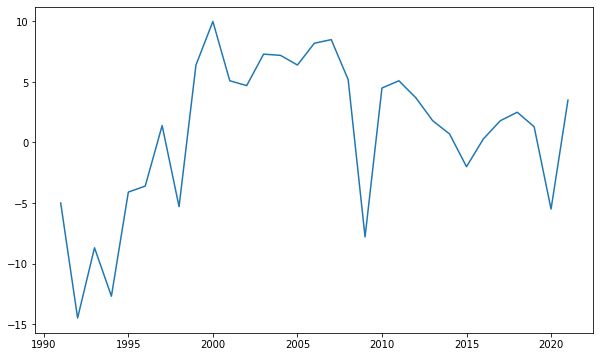

In [ ]:
# Визуализируем данные роста ВВВ Российской Федерации.

df_T['Russian Federation'].plot(figsize=(10, 6))

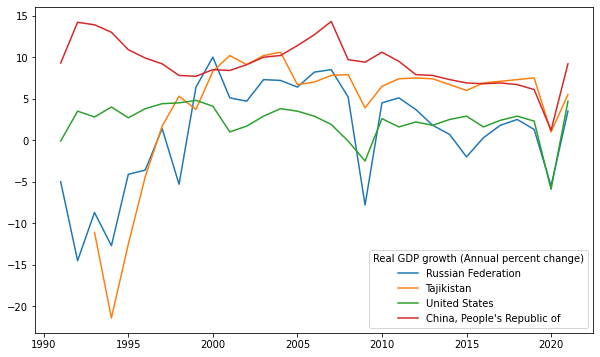

In [ ]:
#  Добавим на график ещё пару "игроков".

df_T[['Russian Federation', 'Tajikistan', 'United States', 'China, People\'s Republic of']].plot(figsize=(10, 6))

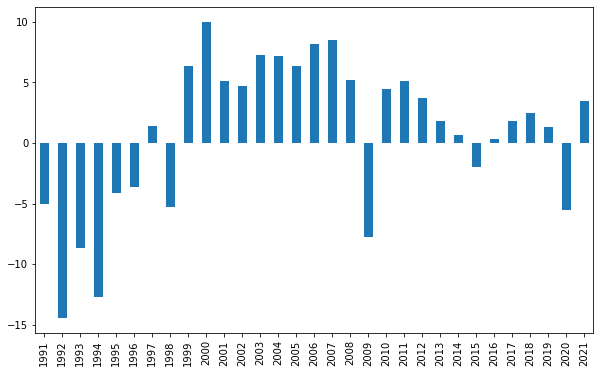

In [ ]:
plt.figure()      #  Построим bar-гистограмму Russian Federation
df_T['Russian Federation'].plot(kind='bar', figsize=(10, 6))

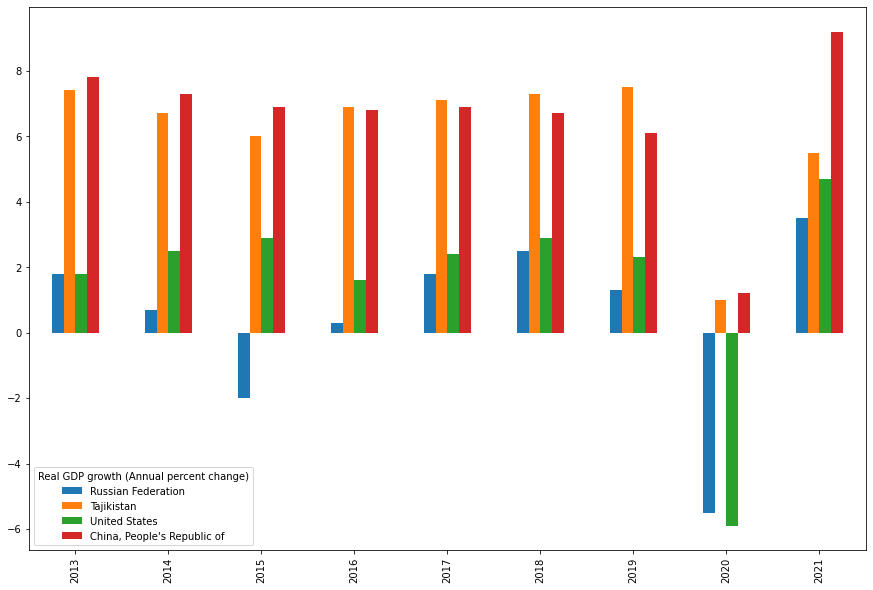

In [ ]:
df_T[22:][['Russian Federation', 'Tajikistan', 'United States', 'China, People\'s Republic of']].plot(kind='bar', figsize=(15, 10))

<Figure size 432x288 with 0 Axes>

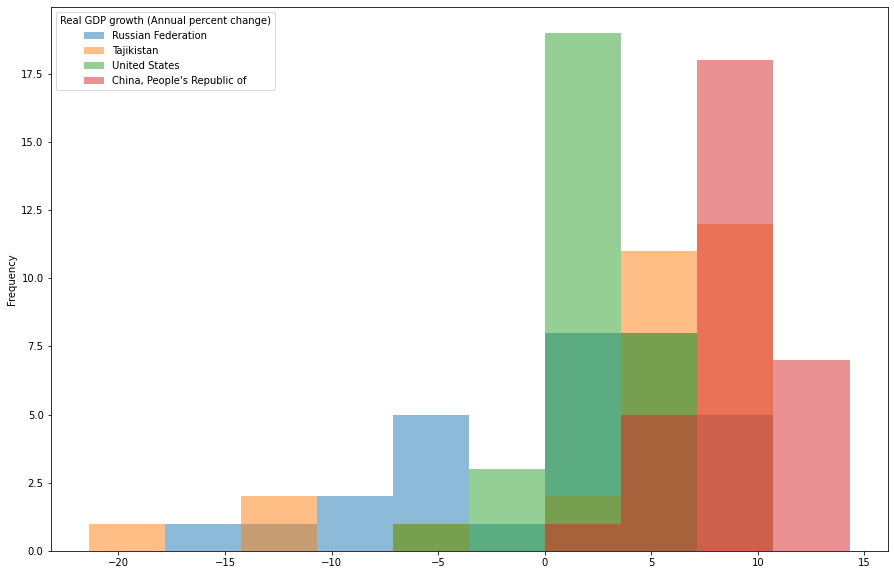

In [ ]:
#  Построим гистограмму частот по нашим игрокам

plt.figure()
df_T[['Russian Federation', 'Tajikistan', 'United States', 'China, People\'s Republic of']].plot.hist(alpha=0.5, figsize=(15, 10))

Box plot(Ящик с усами) график, использующийся в описательной статистике, компактно изображающий одномерное распределение вероятностей. Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы. (Википедия)

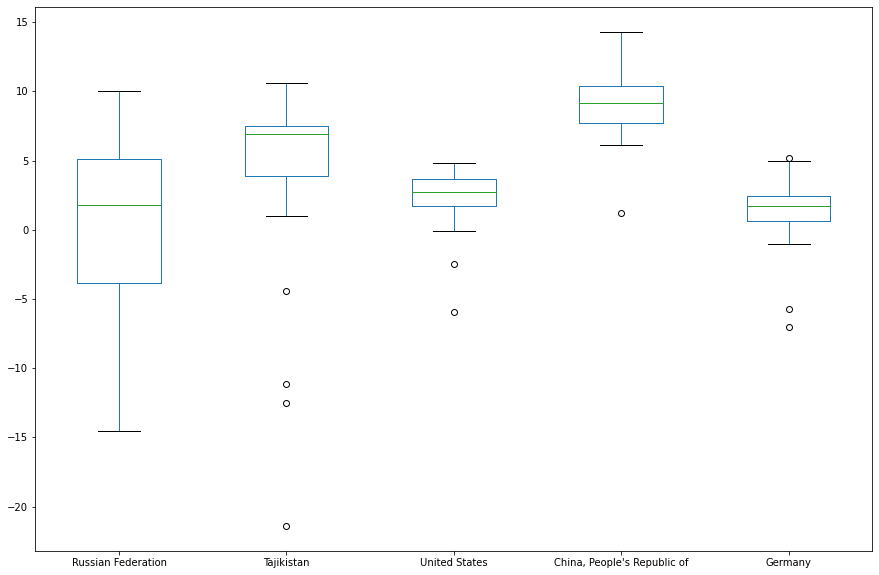

In [ ]:
#  Построим boxplot

df_T[['Russian Federation', 'Tajikistan', 'United States', 'China, People\'s Republic of', 'Germany']].plot.box( figsize=(15, 10))

In [ ]:
df_T.describe()     # Выводит общие статистические данные по DataFrame.

Real GDP growth (Annual percent change),Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"China, People's Republic of",Colombia,Comoros,"Congo, Dem. Rep. of the","Congo, Republic of",...,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Africa (Region),Asia and Pacific,Australia and New Zealand,Caribbean,Central America,Central Asia and the Caucasus,East Asia,Eastern Europe,Europe,Middle East (Region),North Africa,North America,Pacific Islands,South America,South Asia,Southeast Asia,Sub-Saharan Africa (Region),Western Europe,Western Hemisphere (Region),ASEAN-5,Advanced economies,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World,NaN,"©IMF, 2020"
count,19.000000,31.000000,31.000000,31.000000,31.000000,31.000000,29.000000,26.000000,31.000000,31.000000,29.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,27.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,23.000000,31.000000,31.000000,31.000000,31.000000,31.000000,29.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,30.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,0.0,0.0
mean,6.052632,3.245161,2.612903,6.183871,2.658065,2.658065,5.313793,0.857692,2.829032,1.712903,4.724138,1.170968,4.129032,5.838710,0.683871,2.348387,1.616129,3.564516,4.506452,6.26129,3.851613,7.103704,4.025806,2.100000,1.406452,0.406452,5.574194,1.403226,4.864516,7.087097,3.141935,2.074194,1.025806,5.054839,4.309677,9.241935,3.290323,2.322581,1.364516,2.554839,...,2.703226,-1.603226,6.848387,1.845161,3.906452,-0.295652,3.751613,5.545161,2.819355,3.400000,3.738710,4.351724,5.748387,1.145161,1.500000,3.754839,3.638710,2.267742,3.619355,2.464516,6.109677,5.096774,3.822581,1.480645,2.338710,5.006452,1.970968,7.338710,1.754839,4.816129,1.353333,1.593548,2.490323,1.729032,3.825806,3.354839,3.864516,3.448387,NaN,NaN
std,5.643912,7.632511,2.548299,5.282051,5.639727,5.799182,6.816719,5.293481,2.182078,2.220922,11.915106,3.418888,2.444476,1.404915,3.345155,6.507988,2.108569,4.640944,1.564382,2.60764,1.865453,12.533355,4.207768,2.927912,2.294622,6.174244,2.382571,4.063126,3.443017,3.003081,2.830050,2.334233,7.786954,7.166210,3.162631,2.712658,2.416106,2.940375,6.322159,3.623519,...,3.116781,10.756997,1.372557,7.236244,4.460638,9.106914,1.848580,1.750969,2.192019,2.233234,1.848004,4.123766,1.741813,5.293445,2.480994,3.488824,2.525824,2.190036,3.766733,2.925468,1.912129,2.940690,2.085939,2.267218,2.070697,3.004767,2.040130,2.011248,4.699208,1.995678,2.385984,2.306070,2.574407,2.012328,2.607421,2.189496,2.150434,1.717337,NaN,NaN
min,-3.000000,-28.000000,-5.200000,-2.600000,-12.100000,-10.900000,-14.100000,-13.700000,-6.700000,-7.000000,-23.100000,-8.300000,-3.600000,2.000000,-7.600000,-11.700000,-6.900000,-12.000000,1.700000,2.10000,-2.900000,-5.000000,-7.700000,-5.300000,-2.500000,-14.200000,0.200000,-8.000000,-4.000000,-1.600000,-3.800000,-6.200000,-36.400000,-5.600000,-4.500000,1.200000,-4.200000,-6.200000,-13.500000,-5.500000,...,-5.200000,-35.000000,2.700000,-28.000000,-13.300000,-16.300000,-1.700000,-0.200000,-6.700000,-2.800000,-3.000000,-7.400000,-0.100000,-11.400000,-6.700000,-4.000000,-1.700000,-6.

In [ ]:
#  Посмотрим на общие статистические данные по странам, которые мы отображали на графиках.
df_T[['Russian Federation', 'Tajikistan', 'United States', 'China, People\'s Republic of']].describe()

Real GDP growth (Annual percent change),Russian Federation,Tajikistan,United States,"China, People's Republic of"
count,31.000000,29.000000,31.000000,31.000000
mean,0.851613,4.131034,2.296774,9.241935
std,6.307502,7.413217,2.175697,2.712658
min,-14.500000,-21.400000,-5.900000,1.200000
25%,-3.850000,3.900000,1.750000,7.750000
50%,1.800000,6.900000,2.700000,9.200000
75%,5.150000,7.500000,3.650000,10.400000
max,10.000000,10.600000,4.800000,14.300000


In [ ]:
#  Минимальное количество присутствующих в столбце значений
min(df_T.count(axis=0))

0

In [ ]:
#  Максимальное количество присутствующих в столбце значений
df_T.count(axis=0).max()

31

In [ ]:
#  Вместо пропусков значений ставим 0
df_T = df_T.fillna(0, axis=0)

In [ ]:
#  Снова посмотрим на минимальное количество присутствующих в столбце значений
df_T.count(axis=0).min()

31

In [ ]:
# Теперь все значения у нас заполнены, и мы можем построить корреляционную матрицу

df_T_corr = df_T.corr()

In [ ]:
df_T_corr.head()

Real GDP growth (Annual percent change),Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"China, People's Republic of",Colombia,Comoros,"Congo, Dem. Rep. of the","Congo, Republic of",...,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Africa (Region),Asia and Pacific,Australia and New Zealand,Caribbean,Central America,Central Asia and the Caucasus,East Asia,Eastern Europe,Europe,Middle East (Region),North Africa,North America,Pacific Islands,South America,South Asia,Southeast Asia,Sub-Saharan Africa (Region),Western Europe,Western Hemisphere (Region),ASEAN-5,Advanced economies,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World,NaN,"©IMF, 2020"
Real GDP growth (Annual percent change),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.099697,0.290362,0.044416,-0.140189,0.094838,-0.018125,-0.176524,0.134193,-0.154507,0.431885,-0.105514,0.222748,0.316696,-0.054812,0.290911,-0.032077,-0.115656,-0.237714,0.374062,0.261692,-0.221950,-0.017379,0.200121,-0.243737,0.284536,0.119777,0.473053,-0.186638,0.044676,0.189347,-0.120168,0.029125,0.111701,-0.110666,0.226497,0.276385,0.194660,0.514192,0.352242,...,0.267956,0.141213,-0.171887,0.059460,0.569034,0.291229,0.498173,0.390833,0.118444,-0.157840,0.077857,0.294683,0.397975,0.235148,-0.039619,0.101258,0.436989,-0.178241,0.094005,0.197130,0.487841,0.094506,0.389837,-0.211795,-0.084406,0.090057,-0.176236,0.404799,0.231195,0.427013,-0.194773,-0.190947,0.110888,-0.174257,0.246191,-0.103709,0.468972,0.161332,NaN,NaN
Albania,0.099697,1.000000,0.411830,-0.060422,0.152823,-0.239716,0.205735,0.121077,0.508203,0.157200,0.028262,0.516747,0.314939,0.235337,0.435719,0.108204,0.169916,-0.105415,0.027333,0.227579,-0.031353,0.187094,0.043057,0.261523,0.025087,0.437603,-0.023781,-0.198907,0.487717,0.239559,0.398575,0.490243,0.132216,-0.096745,-0.157635,0.151194,0.023071,0.260650,0.242426,0.044900,...,0.041974,-0.105650,0.190728,0.015841,0.138588,-0.082741,0.341141,0.196012,0.529534,0.224501,0.109361,0.096812,0.148289,0.451325,0.266297,-0.194086,0.118658,0.307111,0.027505,0.021855,0.484906,-0.043923,0.417664,0.203929,0.263205,-0.056683,0.241514,0.262278,0.342669,0.186203,0.309683,0.251422,0.002381,0.240746,-0.134709,0.201646,0.410868,0.260287,NaN,NaN
Algeria,0.290362,0.411830,1.000000,0.122252,0.268715,0.060556,0.557326,0.475732,0.623066,0.497357,0.413841,0.531818,0.433216,0.474604,0.544615,0.492274,0.579558,0.382937,-0.086313,0.460069,0.270730,0.233420,0.342794,0.207116,0.024042,0.563473,0.364436,0.357150,0.345171,0.486689,0.670997,0.537128,-0.054477,0.332716,0.236273,0.181663,0.193731,0.383387,0.465309,0.463940,...,0.053966,0.190708,0.265801,0.041959,0.535517,-0.047665,0.730526,0.475811,0.626291,0.473442,0.411066,0.588926,0.442330,0.610119,0.641748,0.448821,0.483408,0.524488,-0.016696,0.201182,0.560446,0.050225,0.689612,0.541739,0.499578,0.032290,0.559556,0.326517,0.620900,0.604280,0.569085,0.556293,0.253309,0.565316,0.581182,0.381684,0.667793,0.651013,NaN,NaN
Angola,0.044416,-0.060422,0.122252,1.000000,0.246329,0.445465,0.290986,0.136979,0.292718,0.318547,0.217968,0.125526,0.487058,-0.305135,0.192145,0.105292,0.264564,0.248354,-0.113261,0.195592,0.327859,0.238599,0.323714,0.554766,0.195961,-0.107419,0.055615,0.047498,0.308242,0.339972,-0.246199,0.190483,-0.024715,0.289694,0.654876,0.741094,0.493170,-0.057451,-0.156733,0.232916,...,0.188345,0.730946,0.445633,0.456220,0.065125,-0.195077,0.318971,0.410085,0.274333,0.327624,0.501266,0.214872,0.46

In [ ]:
# Посмотрим, c показателями роста ВВП каких стран/регионов в большей степени коррелируется показатель роста ВВП России.

df_T_corr['Russian Federation'].abs().sort_values(ascending=False)[:20]

Real GDP growth (Annual percent change)
Russian Federation                          1.000000
Emerging and Developing Europe              0.960711
Eastern Europe                              0.956547
Ukraine                                     0.867753
Kazakhstan                                  0.831794
Myanmar                                     0.829317
Moldova                                     0.800443
Belarus                                     0.787895
Turkmenistan                                0.764913
Tanzania                                    0.749331
Georgia                                     0.741357
Uzbekistan                                  0.729412
Emerging market and developing economies    0.727941
Tajikistan                                  0.726377
Europe                                      0.714705
Sub-Saharan Africa                          0.702496
Africa (Region)                             0.699368
Sub-Saharan Africa (Region)                 0.693706
Centra

## А теперь давайте попробуем предсказать значение роста ВВП России за 2019 год, основываясь на данных показателя роста ВВП других стран.

In [ ]:
# X - это наш набор данных, на котором мы будем обучаться. Удалим столбец 'Russian Federation'.

X = df_T.drop(columns = ['Russian Federation']).copy(deep=True)

In [ ]:
# X_test - это значения показателей роста ВВП других стран за 2019 год
X_test = X[28:29].copy(deep=True)

In [ ]:
# Исключим из нашей выборки по ВВП других стран данные за 2019, 2020, 2021 года
X = X.drop([2019, 2020, 2021]).copy(deep=True)

In [ ]:
X.shape

(28, 227)

In [ ]:
X_test.shape

(1, 227)

In [ ]:
X_test

Real GDP growth (Annual percent change),Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"China, People's Republic of",Colombia,Comoros,"Congo, Dem. Rep. of the","Congo, Republic of",...,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe,Africa (Region),Asia and Pacific,Australia and New Zealand,Caribbean,Central America,Central Asia and the Caucasus,East Asia,Eastern Europe,Europe,Middle East (Region),North Africa,North America,Pacific Islands,South America,South Asia,Southeast Asia,Sub-Saharan Africa (Region),Western Europe,Western Hemisphere (Region),ASEAN-5,Advanced economies,Emerging and Developing Asia,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World,NaN,"©IMF, 2020"
2019,3.0,2.2,0.7,-1.5,5.3,-2.2,7.6,0.4,1.8,1.6,2.3,1.8,1.8,7.9,-0.1,1.2,1.4,0.3,6.4,5.3,2.8,2.7,3.0,1.1,3.9,3.4,5.7,1.8,5.5,7.0,3.7,1.6,3.0,3.0,1.1,6.1,3.3,1.9,4.4,-0.9,...,2.9,-35.0,7.0,2.1,1.5,-8.3,3.2,4.5,1.9,3.3,2.4,2.3,4.8,2.4,1.6,-0.8,3.8,2.0,3.8,-0.1,4.3,4.7,2.9,1.3,1.6,4.8,1.7,5.5,2.1,3.7,1.2,1.7,0.1,1.6,1.2,1.7,3.1,2.9,0.0,0.0


In [ ]:
# Это фактическое значение роста ВВП России за 2019 год, взятое из датасета imf, которое мы попытаемся предсказать.
y_test = df_T['Russian Federation'][2019]
y_test

1.3

In [ ]:
# Фактическое значение роста ВВП России за период 1991 - 2021 годов, взятые из датасета imf.

y = df_T['Russian Federation'].copy(deep=True)

In [ ]:
# Исключим из нашей выборки по росту ВВП России, данные за 2019, 2020, 2021 года

y = y.drop([2019, 2020, 2021]).copy(deep=True)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
print('предсказываемое значение:', reg.predict(X_test).item())
print('    фактическое значение:', y_test)


предсказываемое значение: 1.7162064347850992
    фактическое значение: 1.3
